# prepare a multinomial naive bayes classification model for email classification into spam or not spam

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB , GaussianNB 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score , f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# A wordcloud in python is a visual reresentation of text data that uses --
# --the size and colour of words to show their sequences

In [3]:
df = pd.read_csv(r"C:\Users\faizu\OneDrive\Desktop\spam.csv",encoding = 'latin-1')
# latin_1 encoding is used for assining a unique numerical value to each character which includes many no ascii characters as well.

In [4]:
df = df[['v1','v2']] 
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df = df.rename(columns = {
    'v1' : 'label',
    'v2' : 'text' 
})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
x = df['text']
y = df['label'] 
# x,y

In [7]:
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 42)
# x_train , x_test , y_train , y_test

In [8]:
distribution = y.value_counts() 
# value_counts is used to count the number of unique values in a dataset.
distribution

label
ham     4825
spam     747
Name: count, dtype: int64

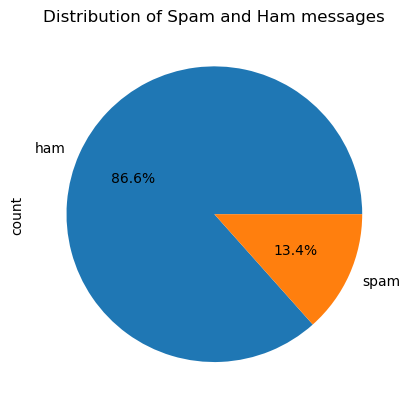

In [9]:
distribution.plot(kind = 'pie',autopct = '%1.1f%%')
plt.title("Distribution of Spam and Ham messages")
plt.show()

In [10]:
# Generate Word Cloud for spam Messages 
spam_text = ' '.join(df[df['label'] == 'spam']['text'])
spam_text

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

In [11]:
spam_wordcloud = WordCloud(width = 800, height = 400,max_words = 100,background_color = 'White',random_state = 42).generate(spam_text)

(-0.5, 799.5, 399.5, -0.5)

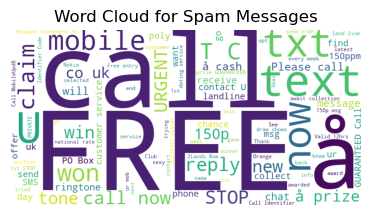

In [12]:
# plot the wordcloud for spam messages 
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.imshow(spam_wordcloud)
plt.title("Word Cloud for Spam Messages")
plt.axis('off')

In [13]:
# Generate Word cloud for Ham Messages
ham_text = ' '.join(df[df['label'] == 'ham']['text']) 
ham_text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thatåÕs the way u feel. ThatåÕs the wa

In [14]:
ham_wordcloud = WordCloud(width = 800, height = 400,max_words = 100,background_color = 'blue',random_state = 42).generate(ham_text)

(-0.5, 799.5, 399.5, -0.5)

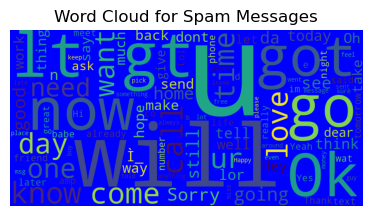

In [15]:
# plot the wordcloud for Ham messages 
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.imshow(ham_wordcloud)
plt.title("Word Cloud for Spam Messages")
plt.axis('off')

In [16]:
# create a countvectorizer to convert text data into numerical features
# countvectorizer is a text-processing technique used in natural language processing task for converting a collection of text document into a numerical representation.

In [17]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# CountVectorizer is a text processing technique used in
# natural language processing task for converting a collection of text document into a numerical representation

In [18]:
# Train a Multinomial Naive Bayes classifier
model_multinomial = MultinomialNB(alpha = 0.8, fit_prior = True, force_alpha = True)
model_multinomial.fit(x_train, y_train)

MultinomialNB(alpha=0.8, force_alpha=True)

In [19]:
# Train a Guassian Naive Bayes classifier

model_gaussian = GaussianNB()
model_gaussian.fit(x_train.toarray(), y_train)

GaussianNB()

In [20]:
# Calculating the Accuracy
y_pred_multinomial = model_multinomial.predict(x_test)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
print("Accuracy for multinomial model is : ", accuracy_multinomial)

Accuracy for multinomial model is :  0.9838565022421525


In [21]:
y_pred_gaussian = model_gaussian.predict(x_test.toarray())
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print("Accuracy for Gaussian model is : ",accuracy_gaussian)

Accuracy for Gaussian model is :  0.9004484304932735


<BarContainer object of 2 artists>

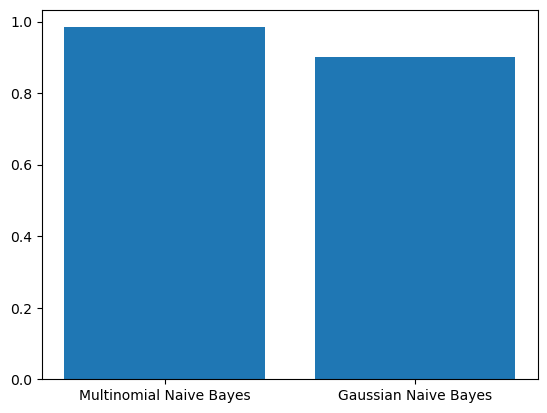

In [22]:
methods = ["Multinomial Naive Bayes", "Gaussian Naive Bayes"]
scores = [accuracy_multinomial, accuracy_gaussian]
plt.bar(methods, scores)